##### Pneumonia detection  using chest X-ray images


In [1]:
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt  
import math
import seaborn as sns           
import os                       
import cv2                       
from PIL import Image            
from itertools import chain      


In [2]:
base_dir = r"C:\Users\Gadha Suresh\Downloads\archive (5)\chest_xray" 
splits = ["test", "train", "val"]
labels = ["NORMAL", "PNEUMONIA"]

file_paths = []
file_labels = []

for split in splits:
    split_dir = os.path.join(base_dir, split)
    #
    for label in labels:
        label_dir = os.path.join(split_dir, label)
        

        if os.path.exists(label_dir):
          
            for file_name in os.listdir(label_dir):
                
                if os.path.isfile(os.path.join(label_dir, file_name)):
                   
                    file_paths.append(os.path.join(label_dir, file_name))
                    file_labels.append(label)

df = pd.DataFrame({
    "name": file_paths,
    "label": file_labels
})

df.to_csv("pneumonia_dataset.csv", index=False)
print("DataFrame saved as 'pneumonia_dataset.csv'")


DataFrame saved as 'pneumonia_dataset.csv'


In [3]:
df.head()

,name,label
0,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL
1,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL
2,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL
3,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL
4,C:\Users\Gadha Suresh\Downloads\archive (5)\ch...,NORMAL


In [4]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(
    df,
    test_size=0.35,  
    stratify=df["label"],
    random_state=42
)

valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.4, 
    stratify=temp_df["label"],
    random_state=42
)
print(f"Train set: {len(train_df)} samples ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validation set: {len(valid_df)} samples ({len(valid_df)/len(df)*100:.1f}%)")
print(f"Test set: {len(test_df)} samples ({len(test_df)/len(df)*100:.1f}%)")
print(f"Total: {len(train_df) + len(valid_df) + len(test_df)} samples")

train_df.to_csv("train_split.csv", index=False)
valid_df.to_csv("valid_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)
print("\nSplits saved as 'train_split.csv', 'valid_split.csv', and 'test_split.csv'")

Train set: 3806 samples (65.0%)
Validation set: 1230 samples (21.0%)
Test set: 820 samples (14.0%)
Total: 5856 samples

Splits saved as 'train_split.csv', 'valid_split.csv', and 'test_split.csv'


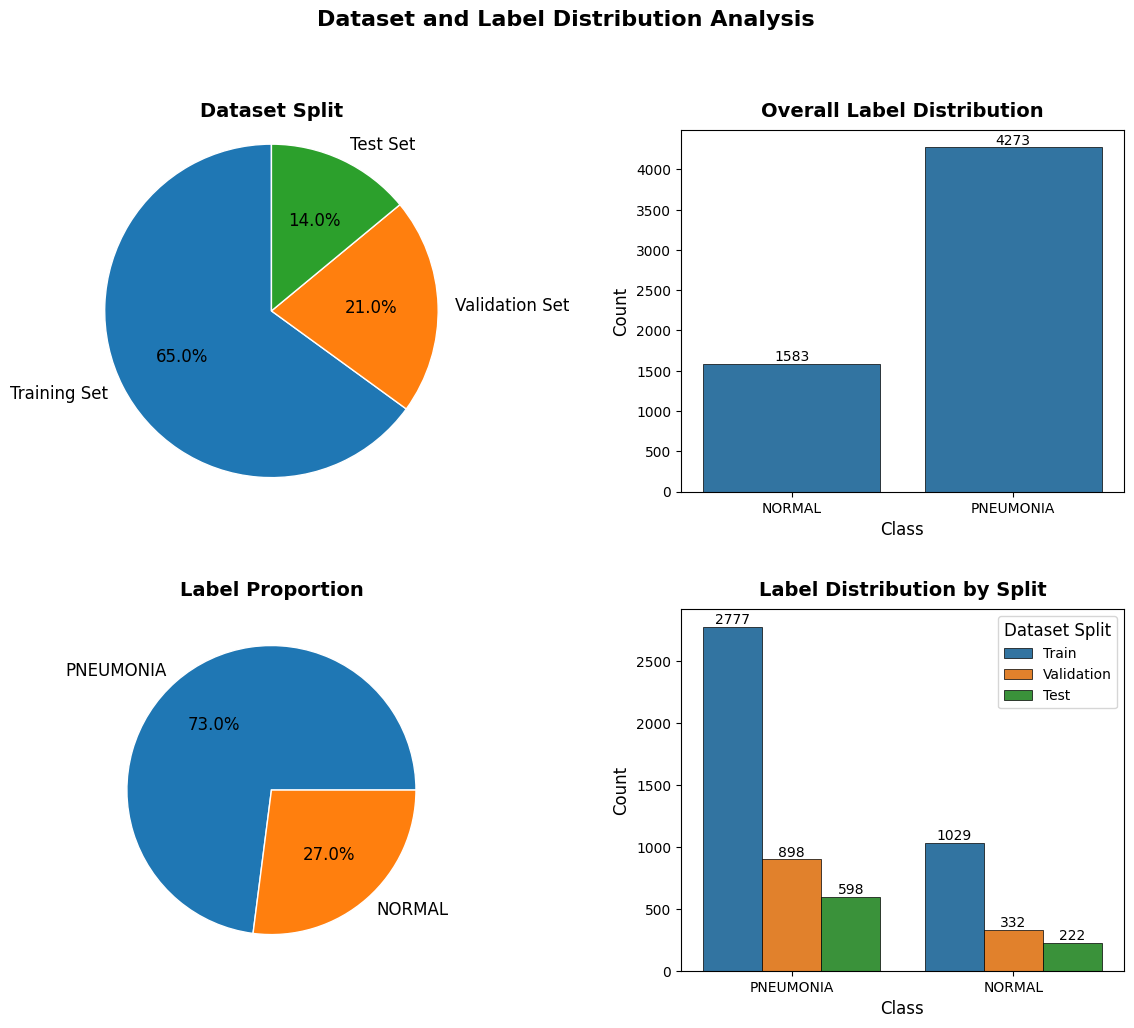

In [5]:

plt.figure(figsize=(12, 10), dpi=100)

# 1. Pie Chart: Dataset Split
plt.subplot(2, 2, 1)
sizes = [len(train_df), len(valid_df), len(test_df)]
labels = ['Training Set', 'Validation Set', 'Test Set']
plt.pie(sizes, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=90, 
        textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Dataset Split', fontsize=14, fontweight='bold', pad=10)
plt.axis('equal')  

# 2. Bar Plot: Overall Label Distribution
plt.subplot(2, 2, 2)
ax2 = sns.countplot(x="label", data=df, edgecolor='black', linewidth=0.5)
for p in ax2.patches:
    height = p.get_height()
    if height > 0: 
        ax2.text(
            p.get_x() + p.get_width() / 2., 
            height + 0.5, 
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )
plt.title("Overall Label Distribution", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 3. Pie Chart: Label Proportion
plt.subplot(2, 2, 3)
df["label"].value_counts(normalize=True).plot(
    kind="pie", autopct="%1.1f%%", textprops={'fontsize': 12}, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title("Label Proportion", fontsize=14, fontweight='bold', pad=10)
plt.ylabel("") 

# 4. Grouped Bar Plot: Label Distribution by Split
plt.subplot(2, 2, 4)
combined_df = pd.concat([
    train_df.assign(split="Train"),
    valid_df.assign(split="Validation"),
    test_df.assign(split="Test")
])

# Create the grouped bar plot
ax = sns.countplot(x="label", hue="split", data=combined_df, edgecolor='black', linewidth=0.5)

for p in ax.patches:
    height = p.get_height()
    if height > 0:  #
        ax.text(
            p.get_x() + p.get_width() / 2.,  
            height + 0.5,                     
            f'{int(height)}',            
            ha='center',                     
            va='bottom',                     
            fontsize=10
        )

plt.title("Label Distribution by Split", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Dataset Split", title_fontsize=12, fontsize=10, loc='best')
plt.tight_layout(pad=3.0)
plt.suptitle("Dataset and Label Distribution Analysis", fontsize=16, fontweight='bold', y=1.05)
plt.show()



Normal Samples:


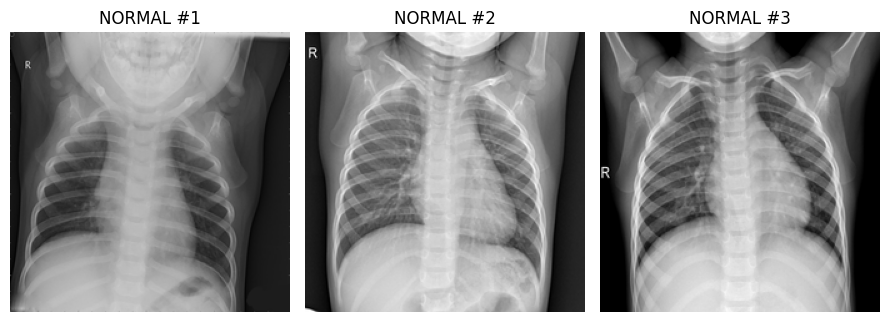


Pneumonia Samples:


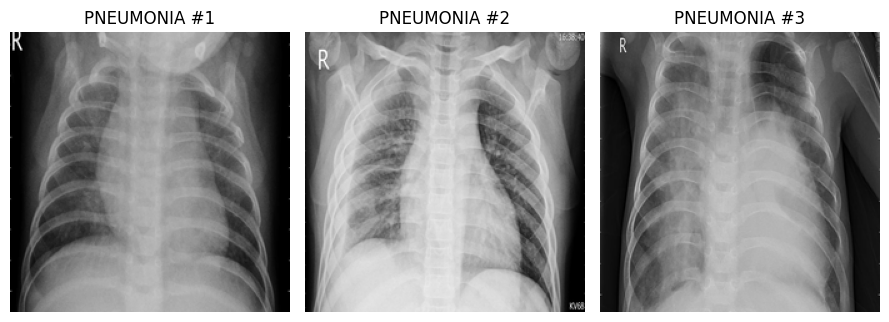

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

def plot_sample_images(df, label, num_samples=3, fixed_size=(224, 224)):
    label_df = df[df["label"] == label]
    if len(label_df) == 0:
        print(f"No images found for label '{label}'")
        return
    
    samples = label_df.sample(min(num_samples, len(label_df)))
    plt.figure(figsize=(3 * num_samples, 4))
    
    for i, (idx, row) in enumerate(samples.iterrows()):
        img = Image.open(row["name"])
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize(fixed_size, Image.Resampling.LANCZOS)
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"{label} #{i + 1}", fontsize=12)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Assuming train_df is defined
print("\nNormal Samples:")
plot_sample_images(train_df, "NORMAL")

print("\nPneumonia Samples:")
plot_sample_images(train_df, "PNEUMONIA")


In [27]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [36]:
CSV_PATH = "pneumonia_dataset.csv"
IMAGE_DIR = "chest_xray_images"

# Reload CSV again
df = pd.read_csv(CSV_PATH)

# Force correct labels (just to be 100% safe)
df["label"] = df["label"].astype(str)

print(df["label"].unique())
print(df["label"].dtype)


['NORMAL' 'PNEUMONIA']
object


In [37]:
from sklearn.model_selection import train_test_split

train_df, temp_df = train_test_split(
    df,
    test_size=0.3,
    stratify=df["label"],
    random_state=42
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df["label"],
    random_state=42
)

print(train_df["label"].unique())
print(val_df["label"].unique())
print(test_df["label"].unique())


['PNEUMONIA' 'NORMAL']
['NORMAL' 'PNEUMONIA']
['PNEUMONIA' 'NORMAL']


In [38]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=IMAGE_DIR,
    x_col="name",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True
)

val_gen = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=IMAGE_DIR,
    x_col="name",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

test_gen = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=IMAGE_DIR,
    x_col="name",
    y_col="label",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)


Found 4099 validated image filenames belonging to 2 classes.
Found 878 validated image filenames belonging to 2 classes.
Found 879 validated image filenames belonging to 2 classes.


In [39]:
print(train_gen.class_indices)


{'NORMAL': 0, 'PNEUMONIA': 1}


In [40]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = DenseNet121(
    weights="imagenet",
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Freeze pretrained layers
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,168,833 (27.35 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [41]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 312s 1s/step - accuracy: 0.8287 - loss: 0.3801 - val_accuracy: 0.9032 - val_loss: 0.2596
Epoch 2/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.8875 - loss: 0.2811 - val_accuracy: 0.9032 - val_loss: 0.2282
Epoch 3/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.9080 - loss: 0.2290 - val_accuracy: 0.9066 - val_loss: 0.2104
Epoch 4/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.9088 - loss: 0.2242 - val_accuracy: 0.9157 - val_loss: 0.1967
Epoch 5/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.9197 - loss: 0.2075 - val_accuracy: 0.9248 - val_loss: 0.1834
Epoch 6/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 213s 827ms/step - accuracy: 0.9224 - loss: 0.2015 - val_accuracy: 0.9214 - val_loss: 0.1877
Epoch 7/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 215s 835ms/step - accuracy: 0.9310 - loss: 0.1828 - val_accuracy: 0.9226 - val_loss: 0.1733
Epoch 8/10
257/257 ━━━━━━━━━━━━━━━━━━━━ 212s 826ms/step - accuracy: 0.9253 - loss: 0.1904 -

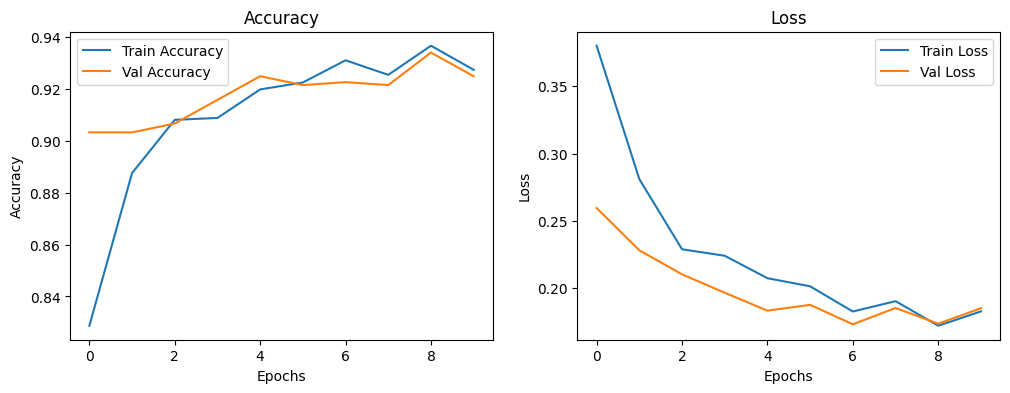

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [43]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc:.4f}")


55/55 ━━━━━━━━━━━━━━━━━━━━ 39s 709ms/step - accuracy: 0.9295 - loss: 0.1764
Test Accuracy: 0.9295


55/55 ━━━━━━━━━━━━━━━━━━━━ 42s 707ms/step


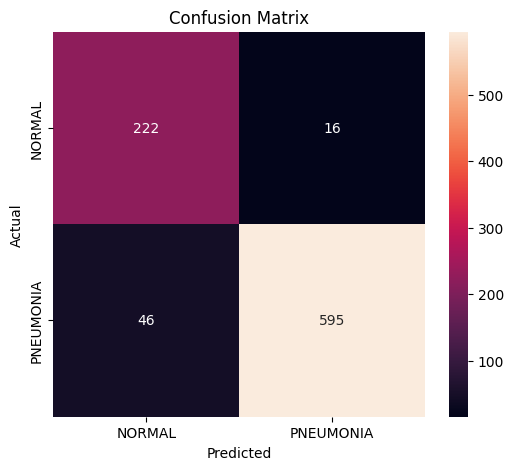

              precision    recall  f1-score   support

      NORMAL       0.83      0.93      0.88       238
   PNEUMONIA       0.97      0.93      0.95       641

    accuracy                           0.93       879
   macro avg       0.90      0.93      0.91       879
weighted avg       0.93      0.93      0.93       879



In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = test_gen.classes
y_pred_prob = model.predict(test_gen)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["NORMAL","PNEUMONIA"],
            yticklabels=["NORMAL","PNEUMONIA"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=["NORMAL","PNEUMONIA"]))


conv5_block16_concat


In [45]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(conv_outputs * pooled_grads, axis=-1)

    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()


In [46]:
import cv2

def overlay_heatmap(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    heatmap = cv2.resize(heatmap, (IMG_SIZE, IMG_SIZE))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(img, 1-alpha, heatmap, alpha, 0)
    return img, heatmap, overlay


In [47]:
idx = 10
img_path = os.path.join(IMAGE_DIR, test_df.iloc[idx]["name"])
true_label = test_df.iloc[idx]["label"]

img = tf.keras.preprocessing.image.load_img(
    img_path,
    target_size=(IMG_SIZE, IMG_SIZE)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

last_conv_layer_name = "conv5_block16_concat"

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
original, heatmap_img, overlay = overlay_heatmap(img_path, heatmap)


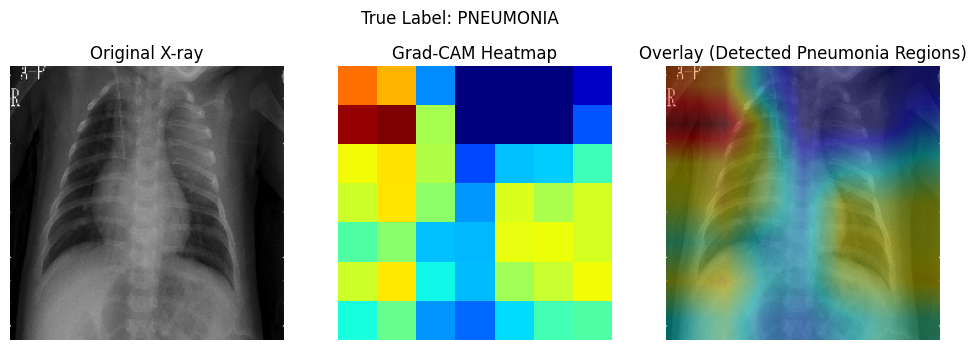

In [48]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(original[:,:,::-1])
plt.title("Original X-ray")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(heatmap, cmap="jet")
plt.title("Grad-CAM Heatmap")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(overlay[:,:,::-1])
plt.title("Overlay (Detected Pneumonia Regions)")
plt.axis("off")

plt.suptitle(f"True Label: {true_label}")
plt.show()


In [49]:
def get_pneumonia_mask(heatmap, threshold=0.5):
    """
    threshold: between 0 and 1
    Higher = more confident regions only
    """
    mask = heatmap > threshold
    return mask.astype("uint8") * 255


In [50]:
mask = get_pneumonia_mask(heatmap, threshold=0.5)

# Resize mask to image size
mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))

# Create a red mask overlay
mask_colored = np.zeros_like(original)
mask_colored[:, :, 2] = mask  # Red channel

highlighted = cv2.addWeighted(original, 0.7, mask_colored, 0.3, 0)


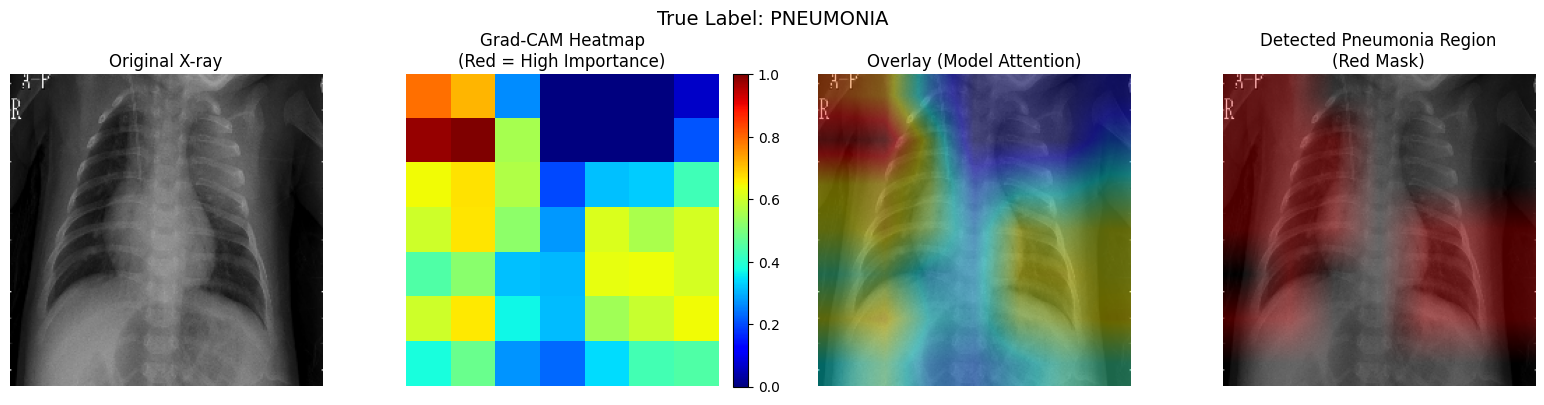

In [51]:
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.imshow(original[:,:,::-1])
plt.title("Original X-ray")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(heatmap, cmap="jet")
plt.colorbar(fraction=0.046, pad=0.04)
plt.title("Grad-CAM Heatmap\n(Red = High Importance)")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(overlay[:,:,::-1])
plt.title("Overlay (Model Attention)")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(highlighted[:,:,::-1])
plt.title("Detected Pneumonia Region\n(Red Mask)")
plt.axis("off")

plt.suptitle(f"True Label: {true_label}", fontsize=14)
plt.tight_layout()
plt.show()


In [63]:
plt.figtext(0.5, -0.05,
            "Red = High importance (pneumonia-related regions), Blue = Low importance",
            ha="center", fontsize=10)


Text(0.5, -0.05, 'Red = High importance (pneumonia-related regions), Blue = Low importance')

<Figure size 640x480 with 0 Axes>

In [64]:
confidence = float(y_pred_prob[idx]) * 100
plt.suptitle(f"True Label: {true_label} | Model Confidence: {confidence:.2f}%", fontsize=14)


C:\Users\Gadha Suresh\AppData\Local\Temp\ipykernel_6680\3467948904.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confidence = float(y_pred_prob[idx]) * 100


Text(0.5, 0.98, 'True Label: PNEUMONIA | Model Confidence: 99.44%')

<Figure size 640x480 with 0 Axes>

In [65]:
plt.savefig("pneumonia_detection_result.png", dpi=300, bbox_inches="tight")


<Figure size 640x480 with 0 Axes>